<a href="https://colab.research.google.com/github/alaa126458/Data-analysis/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#heart disease dataset using logistic regression

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
print("#numbers of original data "+str(len(heart_data)))

#numbers of original data 303


<Axes: xlabel='target', ylabel='count'>

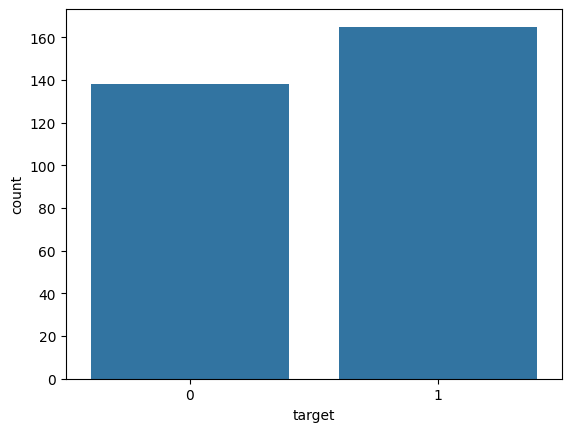

In [13]:
sns.countplot(x="target",data=heart_data)

<Axes: xlabel='target', ylabel='count'>

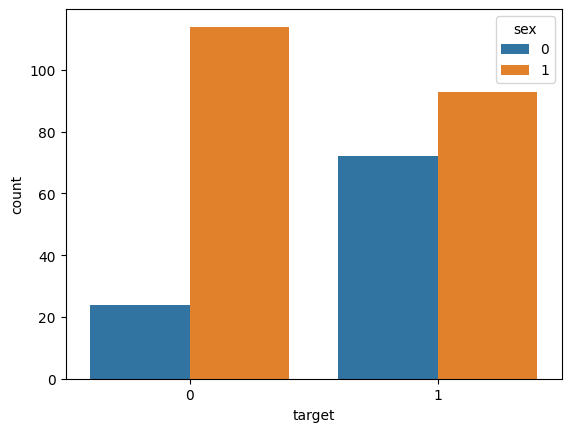

In [15]:
sns.countplot(x="target",hue="sex",data=heart_data)

<Axes: xlabel='target', ylabel='count'>

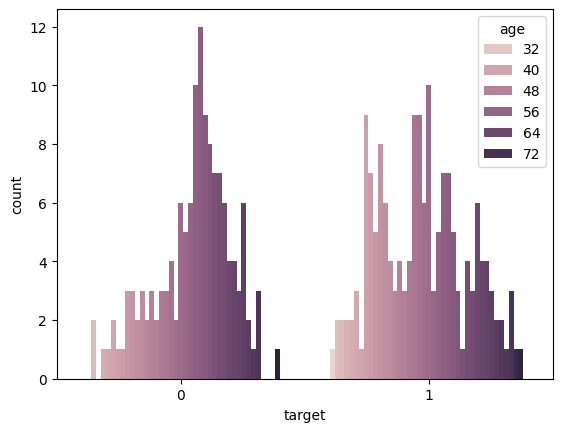

In [16]:
sns.countplot(x="target",hue="age",data=heart_data)

<Axes: ylabel='Frequency'>

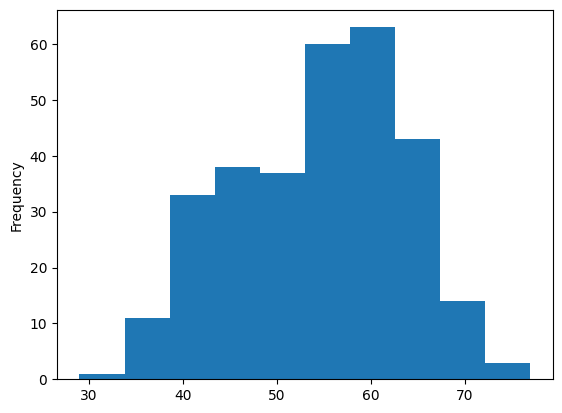

In [17]:
heart_data["age"].plot.hist()

In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

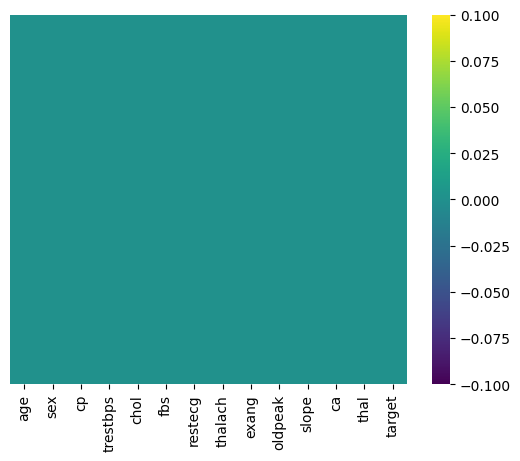

In [22]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap='viridis')

<Axes: xlabel='sex', ylabel='age'>

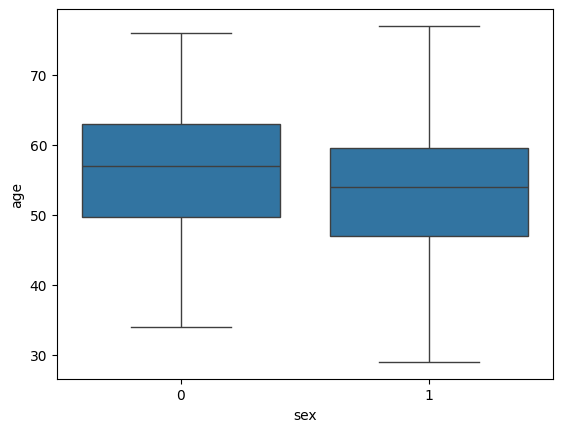

In [24]:
sns.boxplot(x="sex",y="age",data=heart_data)

In [4]:
heart_data.drop(['cp','trestbps','fbs','thalach','exang','oldpeak','slope','ca','thal'], axis=1,inplace=True, errors='ignore')

In [5]:
heart_data.head(5)

,age,sex,chol,restecg,target
0,63,1,233,0,1
1,37,1,250,1,1
2,41,0,204,0,1
3,56,1,236,1,1
4,57,0,354,1,1


In [6]:
x=heart_data.iloc[:,:-1].values
y=heart_data.iloc[:,-1].values

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
from sklearn.model_selection import train_test_split # import train_test_split from model_selection
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Assuming the first column (index 0) of x_train and x_test contains the country names
# We exclude this columnf from scaling
x_train_scaled = sc.fit_transform(x_train[:, 1:]) # Select all rows and columns from index 1 onwards
x_test_scaled = sc.transform(x_test[:, 1:])

In [26]:
x=heart_data.drop('target',axis=1)
y=heart_data['target']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions=logmodel.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77        41\n           1       0.80      0.86      0.83        50\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.80      0.80        91\nweighted avg       0.80      0.80      0.80        91\n'

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[30, 11],
       [ 7, 43]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8021978021978022